In [68]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating spark session

In [2]:
spark = SparkSession.builder.appName('DataReader').getOrCreate()

In [3]:
spark

### Reading CSV file

In [4]:
# Load data from a CSV
file_location = "train.csv"
df = spark.read.format("CSV").option("inferSchema", True).option("header", True).load(file_location)

In [5]:
type(df)

pyspark.sql.dataframe.DataFrame

In [6]:
print(df.columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [7]:
print(df.count())

1460


In [8]:
df.dtypes

[('Id', 'int'),
 ('MSSubClass', 'int'),
 ('MSZoning', 'string'),
 ('LotFrontage', 'string'),
 ('LotArea', 'int'),
 ('Street', 'string'),
 ('Alley', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('OverallQual', 'int'),
 ('OverallCond', 'int'),
 ('YearBuilt', 'int'),
 ('YearRemodAdd', 'int'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('MasVnrType', 'string'),
 ('MasVnrArea', 'string'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinType2', 'string'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('

In [9]:
df.head(n=1)

[Row(Id=1, MSSubClass=60, MSZoning='RL', LotFrontage='65', LotArea=8450, Street='Pave', Alley='NA', LotShape='Reg', LandContour='Lvl', Utilities='AllPub', LotConfig='Inside', LandSlope='Gtl', Neighborhood='CollgCr', Condition1='Norm', Condition2='Norm', BldgType='1Fam', HouseStyle='2Story', OverallQual=7, OverallCond=5, YearBuilt=2003, YearRemodAdd=2003, RoofStyle='Gable', RoofMatl='CompShg', Exterior1st='VinylSd', Exterior2nd='VinylSd', MasVnrType='BrkFace', MasVnrArea='196', ExterQual='Gd', ExterCond='TA', Foundation='PConc', BsmtQual='Gd', BsmtCond='TA', BsmtExposure='No', BsmtFinType1='GLQ', BsmtFinSF1=706, BsmtFinType2='Unf', BsmtFinSF2=0, BsmtUnfSF=150, TotalBsmtSF=856, Heating='GasA', HeatingQC='Ex', CentralAir='Y', Electrical='SBrkr', 1stFlrSF=856, 2ndFlrSF=854, LowQualFinSF=0, GrLivArea=1710, BsmtFullBath=1, BsmtHalfBath=0, FullBath=2, HalfBath=1, BedroomAbvGr=3, KitchenAbvGr=1, KitchenQual='Gd', TotRmsAbvGrd=8, Functional='Typ', Fireplaces=0, FireplaceQu='NA', GarageType='Att

### DataFrame Operations

In [10]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

In [11]:
df.select('HouseStyle').distinct().show()

+----------+
|HouseStyle|
+----------+
|    1.5Fin|
|      SLvl|
|    SFoyer|
|    2.5Fin|
|    2Story|
|    2.5Unf|
|    1Story|
|    1.5Unf|
+----------+



In [53]:
df.select('OverallQual', 'GarageArea', 'PoolArea', 'GrLivArea', 'SalePrice').describe().show()

+-------+------------------+-----------------+-----------------+-----------------+------------------+
|summary|       OverallQual|       GarageArea|         PoolArea|        GrLivArea|         SalePrice|
+-------+------------------+-----------------+-----------------+-----------------+------------------+
|  count|              1460|             1460|             1460|             1460|              1460|
|   mean|6.0993150684931505|472.9801369863014|2.758904109589041|1515.463698630137|180921.19589041095|
| stddev|1.3829965467415926|213.8048414533803|40.17730694453021|525.4803834232024| 79442.50288288663|
|    min|                 1|                0|                0|              334|             34900|
|    max|                10|             1418|              738|             5642|            755000|
+-------+------------------+-----------------+-----------------+-----------------+------------------+



In [54]:
df.select(df['OverallQual'], df['TotalBsmtSF']).show(5)

+-----------+-----------+
|OverallQual|TotalBsmtSF|
+-----------+-----------+
|          7|        856|
|          6|       1262|
|          7|        920|
|          7|        756|
|          8|       1145|
+-----------+-----------+
only showing top 5 rows



In [56]:
df.select(df['OverallQual'], df['TotalBsmtSF'] ** 2).show(5)

+-----------+---------------------+
|OverallQual|POWER(TotalBsmtSF, 2)|
+-----------+---------------------+
|          7|             732736.0|
|          6|            1592644.0|
|          7|             846400.0|
|          7|             571536.0|
|          8|            1311025.0|
+-----------+---------------------+
only showing top 5 rows



In [57]:
df.filter(df['TotalBsmtSF'] > 1000).select('OverallQual', 'TotalBsmtSF', 'GarageArea', 'PoolArea', 'SalePrice').show(n=10)

+-----------+-----------+----------+--------+---------+
|OverallQual|TotalBsmtSF|GarageArea|PoolArea|SalePrice|
+-----------+-----------+----------+--------+---------+
|          6|       1262|       460|       0|   181500|
|          8|       1145|       836|       0|   250000|
|          8|       1686|       636|       0|   307000|
|          7|       1107|       484|       0|   200000|
|          5|       1040|       384|       0|   129500|
|          9|       1175|       736|       0|   345000|
|          7|       1494|       840|       0|   279500|
|          6|       1253|       352|       0|   157000|
|          6|       1004|       480|       0|   149000|
|          5|       1114|       576|       0|   159000|
+-----------+-----------+----------+--------+---------+
only showing top 10 rows



In [16]:
df.groupBy('HouseStyle').count().show()

+----------+-----+
|HouseStyle|count|
+----------+-----+
|    1.5Fin|  154|
|      SLvl|   65|
|    SFoyer|   37|
|    2.5Fin|    8|
|    2Story|  445|
|    2.5Unf|   11|
|    1Story|  726|
|    1.5Unf|   14|
+----------+-----+



### Running SQL Queries Programmatically

In [17]:
numeric_types, _ = zip(*filter(lambda x: x[1] != 'string', df.dtypes))
print(numeric_types)

('Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice')


In [18]:
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("houses")

sqlDF = spark.sql(f"SELECT {numeric_types} FROM houses")
print(sqlDF.show(1, vertical=True))

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 named_struct(col1, Id, col2, MSSubClass, col3, LotArea, col4, OverallQual, col5, OverallCond, col6, YearBuilt, col7, YearRemodAdd, col8, BsmtFinSF1, col9, BsmtFinSF2, col10, BsmtUnfSF, col11, TotalBsmtSF, col12, 1stFlrSF, col13, 2ndFlrSF, col14, LowQualFinSF, col15, GrLivArea, col16, BsmtFullBath, col17, BsmtHalfBath, 

In [19]:
sqlDF = spark.sql("SELECT SalePrice FROM houses WHERE TotalBsmtSF > 500 AND TotalBsmtSF <= 620 ")
display(sqlDF.show(vertical=True))

-RECORD 0-----------
 SalePrice | 68500  
-RECORD 1-----------
 SalePrice | 101000 
-RECORD 2-----------
 SalePrice | 140000 
-RECORD 3-----------
 SalePrice | 164500 
-RECORD 4-----------
 SalePrice | 84500  
-RECORD 5-----------
 SalePrice | 79000  
-RECORD 6-----------
 SalePrice | 127000 
-RECORD 7-----------
 SalePrice | 112000 
-RECORD 8-----------
 SalePrice | 79000  
-RECORD 9-----------
 SalePrice | 151000 
-RECORD 10----------
 SalePrice | 78000  
-RECORD 11----------
 SalePrice | 85000  
-RECORD 12----------
 SalePrice | 95000  
-RECORD 13----------
 SalePrice | 123000 
-RECORD 14----------
 SalePrice | 161000 
-RECORD 15----------
 SalePrice | 155000 
-RECORD 16----------
 SalePrice | 148000 
-RECORD 17----------
 SalePrice | 86000  
-RECORD 18----------
 SalePrice | 128000 
-RECORD 19----------
 SalePrice | 151000 
only showing top 20 rows



None

In [20]:
prices = sqlDF.rdd.map(lambda x: x.SalePrice ** 2).collect()
for name in prices:
    print(name)

4692250000
10201000000
19600000000
27060250000
7140250000
6241000000
16129000000
12544000000
6241000000
22801000000
6084000000
7225000000
9025000000
15129000000
25921000000
24025000000
21904000000
7396000000
16384000000
22801000000
7744000000
22141440000
7921000000
30625000000
9312250000
40000000000
3135216049
21726760000
22801000000
34969000000
30183155289
5625000000
58564000000
6384010000
15376000000
1436410000
19600000000
7744000000
27225000000
9409000000
6972250000
25600000000
19600000000
13665610000
26896000000
21025000000
31684000000
19600000000
6241000000
28900000000
35721000000
24627652624
20779799104
24649000000
11025000000
38809000000
36481000000
12544000000
21025000000


In [58]:
df.createOrReplaceTempView("houses")

# slecting 3 columns YearBuilt, SalePrice and GrLivArea
# groups by the first column, aka YearBuilt
# for each group calculates group length, average of SalePrice and minimum of GrLivArea
# sorts by first column, aka by YearBuilt in descending order
# limits by first 10 entries
display(spark.sql("""
  select YearBuilt, count(YearBuilt) as count, avg(SalePrice) as AverageSalePrice, min(GrLivArea)
  from houses
  group by 1
  order by 1 desc
  limit 10
""").show())

+---------+-----+------------------+--------------+
|YearBuilt|count|  AverageSalePrice|min(GrLivArea)|
+---------+-----+------------------+--------------+
|     2010|    1|          394432.0|          1856|
|     2009|   18|          269220.0|          1212|
|     2008|   23| 348849.1304347826|          1428|
|     2007|   49|255362.73469387754|          1120|
|     2006|   67|251775.44776119402|          1125|
|     2005|   64|     229680.953125|          1072|
|     2004|   54|210347.72222222222|           848|
|     2003|   45|227408.57777777777|           848|
|     2002|   23| 226869.5652173913|          1419|
|     2001|   20|          242630.0|          1212|
+---------+-----+------------------+--------------+



None

In [61]:
price_per_area = spark.sql("""
  select YearBuilt, Count, ROUND(TSalePrice/TGrLivArea, 2) as price_per_area
  from (
    select YearBuilt, sum(1) as Count, sum(SalePrice) as TSalePrice, sum(GrLivArea) as TGrLivArea
    from houses
    group by 1
  )  
  order by 1 desc
""")
display(price_per_area.show())

+---------+-----+--------------+
|YearBuilt|Count|price_per_area|
+---------+-----+--------------+
|     2010|    1|        212.52|
|     2009|   18|        168.03|
|     2008|   23|        162.78|
|     2007|   49|        148.34|
|     2006|   67|        150.28|
|     2005|   64|        141.65|
|     2004|   54|        133.39|
|     2003|   45|        135.28|
|     2002|   23|        127.18|
|     2001|   20|        139.46|
|     2000|   24|        121.29|
|     1999|   25|        122.46|
|     1998|   25|        122.88|
|     1997|   14|        123.49|
|     1996|   15|         139.7|
|     1995|   18|        135.67|
|     1994|   19|        133.24|
|     1993|   17|        121.36|
|     1992|   13|        116.13|
|     1991|    5|        112.35|
+---------+-----+--------------+
only showing top 20 rows



None

In [65]:
price_per_area = price_per_area.toPandas()

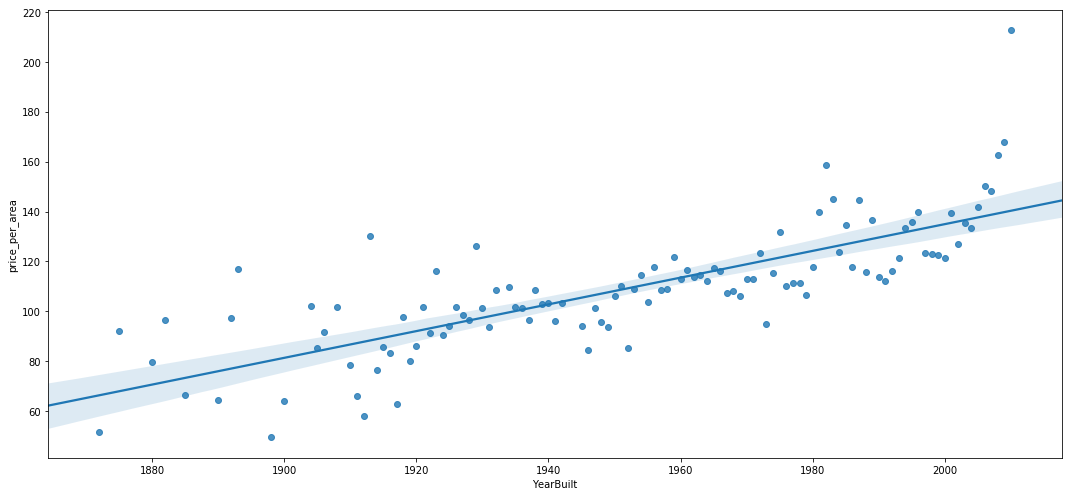

In [73]:
plt.figure(figsize=(15, 7))
sns.regplot(price_per_area['YearBuilt'], price_per_area['price_per_area'])
plt.xlabel('YearBuilt')
plt.ylabel('price_per_area')
plt.tight_layout()
plt.show()

### MLlib

In [76]:
numeric_df = df.select(*numeric_types[1:])

In [86]:
numeric_types

('Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice')

In [93]:
train_df, test_df = numeric_df.randomSplit([0.75, 0.25], seed=10)
print(train_df.count(), test_df.count())

1112 348


In [119]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [95]:
feature_columns = [
    'LotArea', 'OverallQual', 'YearBuilt',  'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea',
    'PoolArea', 'YrSold', '1stFlrSF', '2ndFlrSF'
]


assembler = VectorAssembler(
    inputCols=feature_columns, 
    outputCol="features")

train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)

In [98]:
# Fit a linear regression model
lr = LinearRegression(featuresCol = 'features', labelCol='SalePrice')
lr_model = lr.fit(train_df)

# Output statistics 
trainingSummary = lr_model.summary
print("Coefficients: " + str(lr_model.coefficients))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("R2: %f" % trainingSummary.r2)

Coefficients: [0.6857965164454485,19806.76102504624,309.5117966567114,34.715671128598025,29.818663096502835,-1895.0846785176655,39.75530360332987,122.84628380415798,27.432473922734196,30.881757532525782,28.245298915986773]
RMSE: 35096.745656
R2: 0.799753


In [102]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: SalePrice)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxIter: max number of iterations (>= 0). (default: 100)
predictionCol: prediction column name. (default: prediction)
regParam: regularization parameter (>= 0). (default: 0.0)
solver: The solver algorithm for optimization. Supported options: auto, normal, l-bfgs. (default: auto)
standardization: whether to standardize the trai

In [118]:
# Make predictions.
predictions = lr_model.transform(test_df)
predictions.select("prediction", "SalePrice", "features").show(5)

+------------------+---------+--------------------+
|        prediction|SalePrice|            features|
+------------------+---------+--------------------+
|-49474.63890076266|    39300|[5000.0,1.0,1946....|
| 90347.58555505506|   115000|[6000.0,5.0,1948....|
|  113852.896724761|   119500|[6951.0,5.0,1984....|
|121597.83612978901|   135000|[7000.0,5.0,1960....|
|109026.24675831525|   136500|[7000.0,5.0,1978....|
+------------------+---------+--------------------+
only showing top 5 rows



In [129]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = {:.2f}".format(test_result.rootMeanSquaredError))
print("R Squared (R2) on test data = {:.2f}".format(test_result.r2))

Root Mean Squared Error (RMSE) on test data = 49063.21
R Squared (R2) on test data = 0.65
